# K-means algorithm:-

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data.drop('CustomerID', axis=1)

In [5]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
data.shape

(200, 4)

In [7]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Text(0, 0.5, 'Annual Income (k$)')

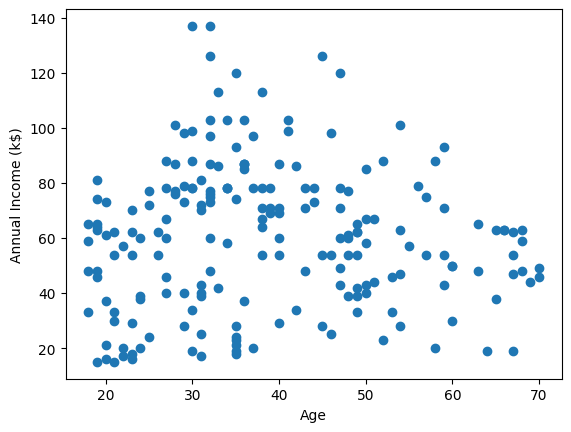

In [8]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [9]:
sse=[]
for k in range(1,(len(data))):
    km=KMeans(n_clusters=k)
    km.fit(data[['Age','Annual Income (k$)']])
    sse.append(km.inertia_)

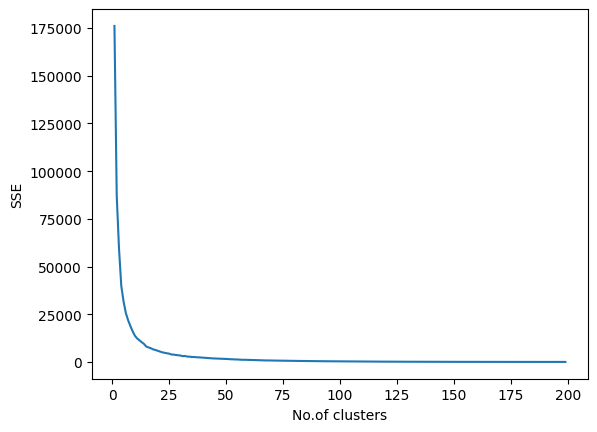

In [10]:
plt.xlabel('No.of clusters')
plt.ylabel('SSE')
plt.plot(range(1,len(data)),sse)

In [11]:
scaler=MinMaxScaler()
data['Annual Income (k$)']=scaler.fit_transform(data[['Annual Income (k$)']])
data['Age']=scaler.fit_transform(data[['Age']])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,0.019231,0.000000,39
1,Male,0.057692,0.000000,81
2,Female,0.038462,0.008197,6
3,Female,0.096154,0.008197,77
4,Female,0.250000,0.016393,40
...,...,...,...,...
195,Female,0.326923,0.860656,79
196,Female,0.519231,0.909836,28
197,Male,0.269231,0.909836,74
198,Male,0.269231,1.000000,18


In [12]:
km_model=KMeans(n_clusters=3)
prediction=km_model.fit_predict(data[['Age','Annual Income (k$)']])

In [13]:
km_model.cluster_centers_

array([[0.31098178, 0.56794651],
       [0.71756602, 0.3126988 ],
       [0.14878543, 0.18550475]])

In [14]:
data['clusters']=prediction
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,0.019231,0.000000,39,2
1,Male,0.057692,0.000000,81,2
2,Female,0.038462,0.008197,6,2
3,Female,0.096154,0.008197,77,2
4,Female,0.250000,0.016393,40,2
...,...,...,...,...,...
195,Female,0.326923,0.860656,79,0
196,Female,0.519231,0.909836,28,0
197,Male,0.269231,0.909836,74,0
198,Male,0.269231,1.000000,18,0


In [15]:
df1=data[data['clusters']==0]
df2=data[data['clusters']==1]
df3=data[data['clusters']==2]

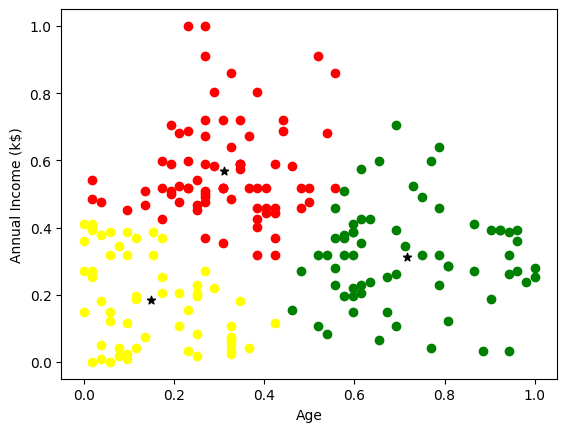

In [17]:
plt.scatter(df1['Age'],df1['Annual Income (k$)'],color='red')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],color='green')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],color='yellow')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
centers=km_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')

# Agglomerative Hierarchical clustering :- 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [20]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
data.shape

(200, 5)

In [22]:
data = data.drop('CustomerID', axis=1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [25]:
scaler=MinMaxScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage

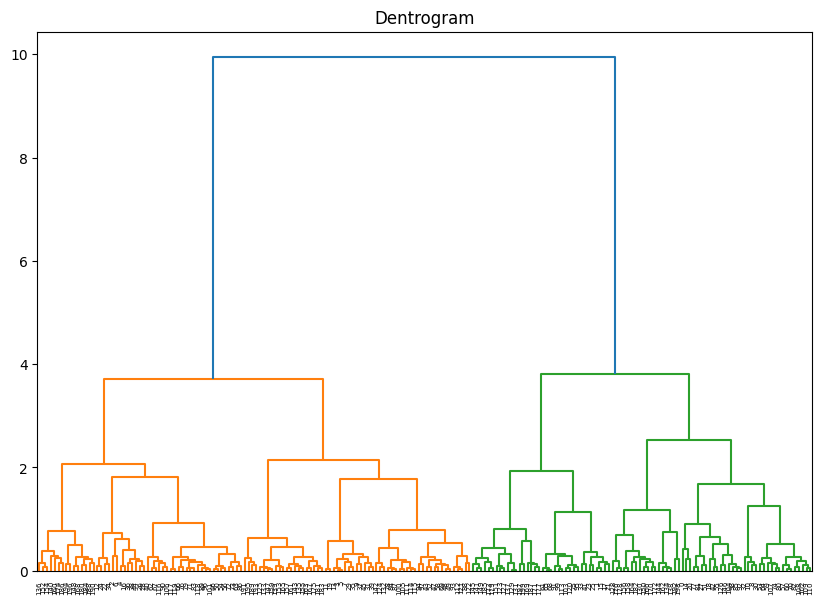

In [27]:
plt.figure(figsize=(10,7))
plt.title('Dentrogram')
dend=dendrogram(linkage(data_scaled,method='ward'))

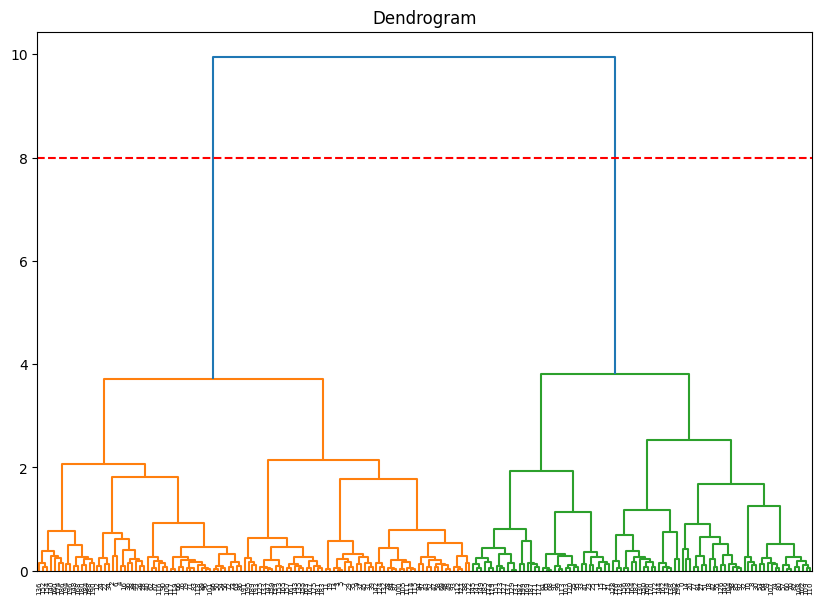

In [28]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=dendrogram(linkage(data_scaled,method='ward'))
plt.axhline(y=8,color='r',linestyle='--')

In [30]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [31]:
clusters=model.fit_predict(data_scaled)
clusters

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

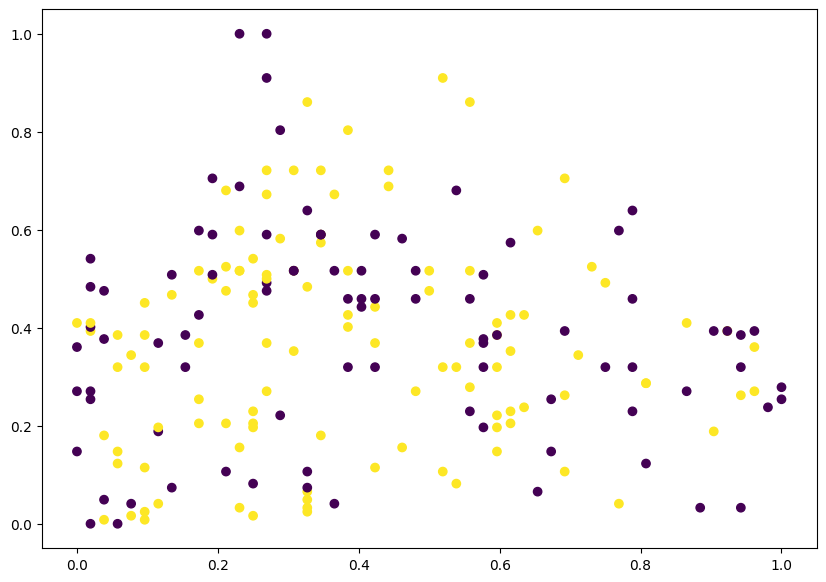

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Age'],data_scaled['Annual Income (k$)'],c=clusters)